In [39]:
cd drive/MyDrive/Network/

[Errno 2] No such file or directory: 'drive/MyDrive/Network/'
/content/drive/MyDrive/Network


In [40]:
import networkx as nx
import random
import csv
from csv import writer
from csv import reader
from geopy.distance import great_circle
from numpy.lib.utils import source
import requests
import json
import numpy as np, numpy.random
from matplotlib import pylab
import matplotlib.pyplot as plt
import pandas as pd
import time



In [41]:
def Randomizer(infile='coord.csv', outfile='coord-o.csv'):
    rows = []
    with open(infile, 'r') as read_obj, \
            open(outfile, 'w', newline='') as write_obj:
        csv_reader = reader(read_obj)
        fields = next(csv_reader)
        csv_writer = writer(write_obj)
        fields_upd = fields+['demand']
        csv_writer.writerow(fields_upd)
        for row in csv_reader:
            row.append(random.randint(0, 100))
            csv_writer.writerow(row)
            rows.append(row)
    return rows


def GetThDistance(coor1, coor2):
    return great_circle(coor1, coor2).km
def GetAPIDistance(row1,row2):
    lon_1, lat_1, lon_2, lat_2 = row1[3], row1[2], row2[3], row2[2]
    r = requests.get(
        f"http://router.project-osrm.org/route/v1/car/{lon_1},{lat_1};{lon_2},{lat_2}?overview=false""")
    routes = json.loads(r.content)

    # print(routes)
    if(routes['code'] != 'Ok'):
        return

    return routes.get("routes")[0]['distance']/1000

def GetRows(filename):
    fields = []
    rows = []
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        fields = next(csvreader)
        for row in csvreader:
            row.append
            rows.append(row)
    return rows


def WriteDistances(infile='coord.csv', outfile='distbetn.csv'):
    with open(infile, 'r') as read_obj, \
            open(outfile, 'w', newline='') as write_obj:
        csv_reader = reader(read_obj)
        fields = next(csv_reader)
        csv_writer = writer(write_obj)
        fields_upd = fields+['dist']
        csv_writer.writerow(fields_upd)
        for row in csv_reader:
            row.append(random.randint(0, 100))
            csv_writer.writerow(row)
            rows.append(row)
    return rows


# Randomizer()
def randomPathGenerator():
    hospitals = GetRows("coord.csv")
    with open('outfile.csv', 'w', newline='') as write_obj:
        for row1 in hospitals:
            for row2 in hospitals:
                if(row1 != row2 and row1[0] == 'Maharashtra' and row2[0] == 'Maharashtra'):
                    lon_1, lat_1, lon_2, lat_2 = row1[3], row1[2], row2[3], row2[2]
                    r = requests.get(
                        f"http://router.project-osrm.org/route/v1/car/{lon_1},{lat_1};{lon_2},{lat_2}?overview=false""")
                    routes = json.loads(r.content)

                    # print(routes)
                    if(routes['code'] != 'Ok'):
                        continue

                    distance = routes.get("routes")[0]['distance']
                    csv_writer = writer(write_obj)
                    row_upd = [row1[0]]+[row1[1]]+[row2[0]]+[row2[1]]+[distance]
                    print(row_upd)
                    csv_writer.writerow(row_upd)
                    if(row2[1] == 'Latur' and row1[1] == 'North Goa'):
                        # print(route_1)
                        print(GetDistance((row1[2], row1[3]), (row2[2], row2[3])))

def GetDistricts(state):
    districts=[]
    with open("coord-all.csv", 'r') as read_obj, \
            open("coord-"+state+".csv", 'w', newline='') as write_obj:
        csv_reader = reader(read_obj)
        fields = next(csv_reader)
        csv_writer = writer(write_obj)
        csv_writer.writerow(fields)
        for row in csv_reader:
            if(row[0] == state):
                csv_writer.writerow(row)
                districts+=[row]
                print(row)
    return districts

def getEdgesReal(sources,sinks):
    edges=[]
    for source in sources:
        for sink in sinks:
            # if sink!=source:
            edges.append(source+sink+[GetAPIDistance(source,sink)])
        print(source+": API calls complete")
    return edges
def getEdgesDummy(sources,sinks):
    edges=[]
    for source in sources:
        for sink in sinks:
            # if sink!=source:
            edges.append(source+sink+[random.randint(1,10000)])
        print(str(source)+": API calls complete")
    return edges
def distributeSourceSink(districts,NumberOfSources):
    sourceDistr=[]
    sinkDistr=[]
    for i in range(NumberOfSources):
        sourceDistr+=[districts[i]]
    for i in range(NumberOfSources,len(districts)):
        sinkDistr+=[districts[i]]
    return sourceDistr, sinkDistr
def randomList(size, sum):
    arr = [0] * size;
    for i in range(sum) :
        arr[random.randint(0, sum) % size] += 1;
    return arr
def GetSources(sourceDistr,TotalCapacity):
    sources=[]
    # sourcesCapacity = [random.randint(0,100) for i in range(len(sourceDistr))]
    # sourcesCapacity = [ TotalCapacity*i/sum(sourcesCapacity) for i in sourcesCapacity ]
    sourcesCapacity = randomList(len(sourceDistr),TotalCapacity)
    for i in range(len(sourceDistr)):
        sources+=[sourceDistr
                  [i]+[sourcesCapacity[i]]]
    return sources
def GetSinks(sinkDistr,TotalRequirement):
    # sinkRequirement = [random.randint(0,100) for i in range(len(sinkDistr))]
    # sinkRequirement = [ TotalCapacity*i/sum(sinkRequirement) for i in sinkRequirement ]
    sinkRequirement = randomList(len(sinkDistr),TotalRequirement)
    for i in range(len(sinkDistr)):
        sinkDistr[i]+=[sinkRequirement[i]]
    return sinkDistr

def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    plt.show()

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

In [42]:
# get districts of the state
statesCapacity={"Maharashtra":991,"Karnataka":275,"Kerala":298,"Tamil Nadu":249,"Orissa":340,"Chhattisgarh":85,"Jharkhand":434,"Gujarat":488}
statesDemand = {"Maharashtra":991,"Karnataka":275,"Kerala":298,"Tamil Nadu":249,"Orissa":340,"Chhattisgarh":85,"Jharkhand":434,"Gujarat":488}
statesDistricts={}
statesSources={}
statesSinks={}

totalDistricts=[]
totalSources=[]
totalSinks=[]
for state in statesCapacity:
  statesDistricts[state]=GetDistricts(state)
  totalDistricts+=statesDistricts[state]
print(len(totalDistricts))
# print(len(districts))

['Maharashtra', 'Ahmednagar', '19.21759903201788', '74.69220260610572']
['Maharashtra', 'Akola', '20.746310479041906', '77.12122320359276']
['Maharashtra', 'Amravati', '21.165209918107358', '77.67583503184723']
['Maharashtra', 'Aurangabad', '20.097922883295197', '75.32072196796334']
['Maharashtra', 'Bhandara', '21.211792649727748', '80.10950199637024']
['Maharashtra', 'Bid', '18.952353340080986', '75.69319706477731']
['Maharashtra', 'Buldana', '20.56680611183355', '76.39017880364096']
['Maharashtra', 'Chandrapur', '20.095609090909075', '79.31556380471388']
['Maharashtra', 'Dhule', '21.274018690400514', '74.58719071837263']
['Maharashtra', 'Garhchiroli', '19.795546096654277', '80.30965563816602']
['Maharashtra', 'Gondiya', '21.225008411214993', '80.17522698598128']
['Maharashtra', 'Greater Bombay', '19.085069788026964', '72.84261961332419']
['Maharashtra', 'Hingoli', '19.59525302245251', '77.09239412780653']
['Maharashtra', 'Jalgaon', '20.8828943415638', '75.55140421810695']
['Maharasht

In [43]:
for state in statesCapacity:
  print(-(-len(statesDistricts[state])//5))
  # -(-a // b)

7
6
3
6
6
4
5
5


In [44]:
for state in statesCapacity:
  sourceDistr,sinkDistr = distributeSourceSink(statesDistricts[state],-(-len(statesDistricts[state])//5))
  statesSources[state]=GetSources(sourceDistr,statesCapacity[state])
  statesSinks[state]=GetSinks(sinkDistr,statesDemand[state])
  totalSinks+=statesSinks[state]
  totalSources+=statesSources[state]
print(totalSinks)  
# print(sourceDistr)
# print(sinkDistr)
# # Get sources and random capacities with 275 sum
# sources=GetSources(sourceDistr,275)
# print(sources)

[['Maharashtra', 'Chandrapur', '20.095609090909075', '79.31556380471388', 24], ['Maharashtra', 'Dhule', '21.274018690400514', '74.58719071837263', 39], ['Maharashtra', 'Garhchiroli', '19.795546096654277', '80.30965563816602', 35], ['Maharashtra', 'Gondiya', '21.225008411214993', '80.17522698598128', 32], ['Maharashtra', 'Greater Bombay', '19.085069788026964', '72.84261961332419', 35], ['Maharashtra', 'Hingoli', '19.59525302245251', '77.09239412780653', 32], ['Maharashtra', 'Jalgaon', '20.8828943415638', '75.55140421810695', 38], ['Maharashtra', 'Jalna', '19.984612534818933', '75.98473607242339', 36], ['Maharashtra', 'Kolhapur', '16.44881301587301', '74.12897150793648', 34], ['Maharashtra', 'Latur', '18.348687268993856', '76.75812607802874', 49], ['Maharashtra', 'Nagpur', '21.196556862745105', '79.02166176470584', 36], ['Maharashtra', 'Nanded', '19.209316983017', '77.6829048951049', 58], ['Maharashtra', 'Nandurbar', '21.523175625248147', '74.32638757443429', 40], ['Maharashtra', 'Nashik

In [45]:
print(statesSinks)
# # Give random requirement to all cities summing to 275
# sinks=GetSinks(sinkDistr,275)
# print(sinks)

{'Maharashtra': [['Maharashtra', 'Chandrapur', '20.095609090909075', '79.31556380471388', 24], ['Maharashtra', 'Dhule', '21.274018690400514', '74.58719071837263', 39], ['Maharashtra', 'Garhchiroli', '19.795546096654277', '80.30965563816602', 35], ['Maharashtra', 'Gondiya', '21.225008411214993', '80.17522698598128', 32], ['Maharashtra', 'Greater Bombay', '19.085069788026964', '72.84261961332419', 35], ['Maharashtra', 'Hingoli', '19.59525302245251', '77.09239412780653', 32], ['Maharashtra', 'Jalgaon', '20.8828943415638', '75.55140421810695', 38], ['Maharashtra', 'Jalna', '19.984612534818933', '75.98473607242339', 36], ['Maharashtra', 'Kolhapur', '16.44881301587301', '74.12897150793648', 34], ['Maharashtra', 'Latur', '18.348687268993856', '76.75812607802874', 49], ['Maharashtra', 'Nagpur', '21.196556862745105', '79.02166176470584', 36], ['Maharashtra', 'Nanded', '19.209316983017', '77.6829048951049', 58], ['Maharashtra', 'Nandurbar', '21.523175625248147', '74.32638757443429', 40], ['Mahar

In [46]:
# get distance between all sources and sinks
edges=getEdgesDummy(totalSources,totalSinks)
print("EDGES:")
print(len(edges))
# pd.DataFrame(sources).to_csv(state+"_sources.csv",index=False)
# pd.DataFrame(sinks).to_csv(state+"_sinks.csv",index=False)
# pd.DataFrame(edges).to_csv("MH-KAR-KL-TM-OR-CH-JH-GJ_edges.csv",index=False)


['Maharashtra', 'Ahmednagar', '19.21759903201788', '74.69220260610572', 148]: API calls complete
['Maharashtra', 'Akola', '20.746310479041906', '77.12122320359276', 138]: API calls complete
['Maharashtra', 'Amravati', '21.165209918107358', '77.67583503184723', 135]: API calls complete
['Maharashtra', 'Aurangabad', '20.097922883295197', '75.32072196796334', 139]: API calls complete
['Maharashtra', 'Bhandara', '21.211792649727748', '80.10950199637024', 145]: API calls complete
['Maharashtra', 'Bid', '18.952353340080986', '75.69319706477731', 158]: API calls complete
['Maharashtra', 'Buldana', '20.56680611183355', '76.39017880364096', 128]: API calls complete
['Karnataka', 'Bagalkot', '16.15860676328503', '75.64526070853468', 45]: API calls complete
['Karnataka', 'Bangalore Rural', '12.936827087794448', '77.47369314775169', 39]: API calls complete
['Karnataka', 'Bangalore Urban', '12.901924930747917', '77.58685595567866', 50]: API calls complete
['Karnataka', 'Belgaum', '16.16107219152853

In [47]:

# pd.DataFrame(totalSources).to_csv("MH-KAR-KL-TM-OR-CH-JH-GJ"+"_sources.csv",index=False)
# pd.DataFrame(totalSinks).to_csv("MH-KAR-KL-TM-OR-CH-JH-GJ"+"_sinks.csv",index=False)
# pd.DataFrame(edges).to_csv("MH-KAR-KL-TM-OR-CH-JH-GJ"+"_edges.csv",index=False)

print(totalSources)
print(totalSinks)
print(edges)


[['Maharashtra', 'Ahmednagar', '19.21759903201788', '74.69220260610572', 148], ['Maharashtra', 'Akola', '20.746310479041906', '77.12122320359276', 138], ['Maharashtra', 'Amravati', '21.165209918107358', '77.67583503184723', 135], ['Maharashtra', 'Aurangabad', '20.097922883295197', '75.32072196796334', 139], ['Maharashtra', 'Bhandara', '21.211792649727748', '80.10950199637024', 145], ['Maharashtra', 'Bid', '18.952353340080986', '75.69319706477731', 158], ['Maharashtra', 'Buldana', '20.56680611183355', '76.39017880364096', 128], ['Karnataka', 'Bagalkot', '16.15860676328503', '75.64526070853468', 45], ['Karnataka', 'Bangalore Rural', '12.936827087794448', '77.47369314775169', 39], ['Karnataka', 'Bangalore Urban', '12.901924930747917', '77.58685595567866', 50], ['Karnataka', 'Belgaum', '16.16107219152853', '74.72329042357275', 39], ['Karnataka', 'Bellary', '15.074377548209377', '76.47228471074374', 59], ['Karnataka', 'Bidar', '17.950361730769224', '77.19459961538459', 43], ['Kerala', 'Alap

In [ ]:
# sources = pd.read_csv(state+"_sources.csv").values.tolist()
# sinks = pd.read_csv(state+"_sinks.csv").values.tolist()
# edges = pd.read_csv(state+"_edges.csv").values.tolist()
# print(sources)
# print(sinks)
# print(edges)

In [48]:
for edge in edges:
  if edge[10]<1:
    print(edge)

In [ ]:
# G = nx.DiGraph()
# G.add_node("Super-source",type='source')
# G.add_node("Super-sink",type='sink')
# for source in sources:
#   G.add_node(source[1],type='source')
#   G.add_edge("Super-source",source[1],weight=int(source[1][4]))
# for sink in sinks:
#   G.add_node(sink[1],type='sink')
#   G.add_edge(sink[1],"Super-sink",weight=int(sink[1][4]))

# for edge in edges:
#   G.add_edge(edge[0][1], edge[1][1], weight=int(edge[2]) )

In [65]:
def modelSimplex():
  G = nx.DiGraph()
  totalDemand=0
  for source in totalSources:
    G.add_node(source[1],type='source',demand=-1*int(source[4]))
    totalDemand+=-1*int(source[4])
  print("Source Demand: ")
  print(totalDemand)
  for sink in totalSinks:
    G.add_node(sink[1],type='sink',demand=int(sink[4]))
    totalDemand+=int(sink[4])
  # flowCost, flowDict = nx.network_simplex(G)
  for edge in edges:
    # if float(edge[10])!=float("nan"):
    G.add_edge(edge[1], edge[6], weight=int(edge[10]) )
  # G.add_node(sink[1],type='sink',demand=totalDemand)
  print(totalDemand)
  return G


def modelMaxFlow():
  G = nx.DiGraph()
  totalDemand=0
  G.add_node("Super-source",type='source')
  G.add_node("Super-sink",type='sink')
  for source in totalSources:
    G.add_node(source[1],type='source')
    G.add_edge("Super-source",source[1],capacity=source[4])
    totalDemand+=-1*int(source[4])
  print("Source Demand: ")
  print(totalDemand)
  for sink in totalSinks:
    G.add_node(sink[1],type='sink')
    G.add_edge(sink[1],"Super-sink",capacity=sink[4])
    totalDemand+=int(sink[4])
  # flowCost, flowDict = nx.network_simplex(G)
  for edge in edges:
    # if float(edge[10])!=float("nan"):
    G.add_edge(edge[1], edge[6], weight=int(edge[10]) )
  # G.add_node(sink[1],type='sink',demand=totalDemand)
  print(totalDemand)
  return G



In [66]:
G=modelMaxFlow()
G.edges().data()

Source Demand: 
-3160
0


OutEdgeDataView([('Super-source', 'Ahmednagar', {'capacity': 148}), ('Super-source', 'Akola', {'capacity': 138}), ('Super-source', 'Amravati', {'capacity': 135}), ('Super-source', 'Aurangabad', {'capacity': 139}), ('Super-source', 'Bhandara', {'capacity': 145}), ('Super-source', 'Bid', {'capacity': 158}), ('Super-source', 'Buldana', {'capacity': 128}), ('Super-source', 'Bagalkot', {'capacity': 45}), ('Super-source', 'Bangalore Rural', {'capacity': 39}), ('Super-source', 'Bangalore Urban', {'capacity': 50}), ('Super-source', 'Belgaum', {'capacity': 39}), ('Super-source', 'Bellary', {'capacity': 59}), ('Super-source', 'Bidar', {'capacity': 43}), ('Super-source', 'Alappuzha', {'capacity': 87}), ('Super-source', 'Ernakulam', {'capacity': 103}), ('Super-source', 'Idukki', {'capacity': 108}), ('Super-source', 'Ariyalur', {'capacity': 44}), ('Super-source', 'Chennai', {'capacity': 42}), ('Super-source', 'Coimbatore', {'capacity': 49}), ('Super-source', 'Cuddalore', {'capacity': 36}), ('Super-

In [64]:
# Test Models
# G = nx.DiGraph()
# G.add_node(1)
# G.add_node(2)
# # G.add_node(3)

# G.add_edge("s",1,capacity=10)
# # G.add_edge("s",2,capacity=10)
# # G.add_edge("s",3,capacity=10)
# G.add_edge(1,2,weight=2)
# G.add_edge(2,"t",capacity=10)
# # G.add_edge(2,"t",capacity=10)
# # G.add_edge(3,"t",capacity=10)
# mincostFlow = nx.max_flow_min_cost(G, "s", "t")
# print(nx.cost_of_flow(G, mincostFlow)
# )

20


In [70]:

start = time.time()
mincostFlow = nx.max_flow_min_cost(G, "Super-source", "Super-sink")
print(nx.cost_of_flow(G, mincostFlow))
end = time.time()
print(end - start)

1015946
0.5972180366516113


In [68]:
print(mincostFlow)

{'Super-source': {'Ahmednagar': 123, 'Akola': 138, 'Amravati': 135, 'Aurangabad': 139, 'Bhandara': 145, 'Bid': 151, 'Buldana': 128, 'Bagalkot': 45, 'Bangalore Rural': 39, 'Bangalore Urban': 50, 'Belgaum': 39, 'Bellary': 59, 'Bidar': 43, 'Alappuzha': 87, 'Ernakulam': 103, 'Idukki': 108, 'Ariyalur': 44, 'Chennai': 42, 'Coimbatore': 49, 'Cuddalore': 36, 'Dharmapuri': 43, 'Dindigul': 35, 'Angul': 53, 'Baleshwar': 55, 'Baragarh': 72, 'Bhadrak': 57, 'Bolangir': 47, 'Boudh': 56, 'Bastar': 24, 'Bilaspur': 18, 'Dantewada': 16, 'Dhamtari': 27, 'Bokaro': 116, 'Chatra': 80, 'Deoghar': 85, 'Dhanbad': 79, 'Dumka': 74, 'Ahmadabad': 99, 'Amreli': 108, 'Anand': 88, 'Banas Kantha': 98, 'Bharuch': 95}, 'Super-sink': {}, 'Ahmednagar': {'Chandrapur': 0, 'Dhule': 0, 'Garhchiroli': 0, 'Gondiya': 0, 'Greater Bombay': 0, 'Hingoli': 0, 'Jalgaon': 0, 'Jalna': 0, 'Kolhapur': 0, 'Latur': 0, 'Nagpur': 0, 'Nanded': 0, 'Nandurbar': 0, 'Nashik': 0, 'Osmanabad': 0, 'Parbhani': 0, 'Pune': 0, 'Raigarh': 0, 'Ratnagiri': 0

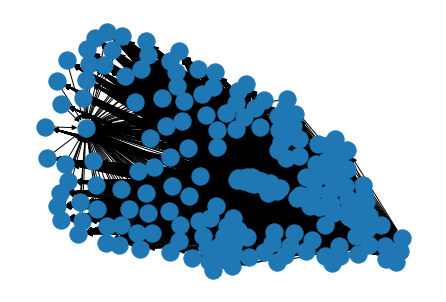

In [69]:
nx.draw(G)

In [13]:

start = time.time()

flowCost, flowDict = nx.network_simplex(G)
end = time.time()
print(end - start)
with open(state+"_flow.json", "w") as outfile:
  outfile.write(str(end-start))

NetworkXUnfeasible: ignored

In [ ]:
lprint(flowCost)
print(flowDict)

In [ ]:
with open(state+"_flow.json", "w") as outfile: 
  json.dump(flowDict, outfile)
with open(state+'_flowCost.txt', 'w') as f:
  f.write(str(flowCost))

In [ ]:
save_graph(G,"my_graph.pdf")


In [ ]:
nx.draw_networkx(G, with_labels = True)
plt.show()

In [ ]:
!nvcc --version

In [ ]:
!conda install -c nvidia -c rapidsai -c numba -c conda-forge cugraph cudatoolkit=11.0


In [ ]:
!pip install conda

In [ ]:
!lshw -C display

In [ ]:
!apt install lshw -y

In [ ]:
!ls